## Introducción

La segmentación de clientes es una de las tareas más importantes dentro del marketing analítico y la gestión comercial. Permite identificar grupos de consumidores con comportamientos, necesidades y características similares, facilitando así la personalización de estrategias, campañas y productos.  
En este trabajo, se llevará a cabo un ejercicio de **clustering** para agrupar clientes en función de sus características sociodemográficas y patrones de consumo, con el fin de descubrir perfiles diferenciados que puedan orientar acciones de marketing más efectivas.

---

## Descripción del Problema

En un entorno altamente competitivo, las empresas necesitan conocer en profundidad a sus clientes para optimizar sus recursos y maximizar el retorno de sus campañas. Sin una segmentación adecuada, las estrategias comerciales tienden a ser genéricas, poco precisas y con bajo impacto.

El desafío que se aborda en este proyecto consiste en **agrupar a los clientes según su comportamiento de compra, nivel de ingresos, composición familiar y nivel educativo**, con el fin de obtener información accionable que ayude a definir estrategias de fidelización, cross-selling y comunicación segmentada.

Se explorará el conjunto de datos para comprender las principales variables que describen a los consumidores, y luego se aplicarán técnicas de reducción de dimensionalidad y agrupamiento (como *K-Means* o *Hierarchical Clustering*) para identificar patrones y segmentos relevantes.

---

## Objetivo

El objetivo principal de este trabajo es **identificar grupos homogéneos de clientes** a partir de sus características y comportamientos de consumo.  
A través de técnicas de análisis no supervisado, se buscará responder preguntas como:

- ¿Existen perfiles claramente diferenciados de clientes según sus hábitos de compra?  
- ¿Qué variables son más relevantes para distinguir a los distintos segmentos?  
- ¿Cómo pueden aprovecharse estos segmentos para diseñar estrategias de marketing más efectivas?

Además, se evaluará la calidad de los clusters generados mediante métricas como la **suma de distancias intra-cluster** o el **índice de silueta**, con el propósito de seleccionar la segmentación más representativa y útil para la toma de decisiones.

---

## Fuente

Los datos utilizados en este proyecto provienen del dataset **[Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)**, disponible en Kaggle.  
Este conjunto de datos contiene información detallada de **2.240 clientes** de una empresa minorista, incluyendo atributos como:

- **Datos sociodemográficos**: edad, nivel educativo, estado civil, ingresos, cantidad de hijos y adolescentes en el hogar.  
- **Comportamiento de compra**: gasto anual por categoría de producto (vinos, carnes, dulces, oro, frutas, etc.).  
- **Interacciones con campañas de marketing** y frecuencia de compras por canal (web, catálogo o tienda física).  
- **Engagement**: recencia de la última compra y respuesta a campañas promocionales.

Estas variables brindan una base sólida para aplicar técnicas de *data mining* orientadas a la **identificación de segmentos de clientes** con características y patrones de consumo similares.

---


## Importación de Librerías y Carga de Datos


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.preprocessing import RobustScaler

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

In [37]:
from sklearn.cluster import KMeans

In [38]:
import seaborn as sns

In [39]:
def download_and_read_csv_from_google_drive(file_id):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    csv_path = "./data.csv"

    # Descargar el archivo directamente usando gdown
    gdown.download(url, csv_path, quiet=False)

    # Leer el CSV descargado
    df = pd.read_csv(csv_path, sep = '\t')
    return df

In [40]:
# ID del archivo de Google Drive
file_id = "1iBZ6Skz7YuJwmDEx5ftAEVCxPDi2lJSK"

In [41]:
df = download_and_read_csv_from_google_drive(file_id)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iBZ6Skz7YuJwmDEx5ftAEVCxPDi2lJSK
To: /content/data.csv
100%|██████████| 220k/220k [00:00<00:00, 62.5MB/s]


In [42]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

## Exploración de datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [43]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [44]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [46]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### 1. **Cantidad de registros**
- El dataset contiene un total de **2,240 registros** y **29 columnas**.
- Este tamaño es adecuado para realizar análisis exploratorios y aplicar técnicas de **clustering** sin comprometer la eficiencia computacional.

---

#### 2. **Tipos de datos**
- **Numéricos**:
  - 26 columnas de tipo numérico (`int64` y `float64`), que incluyen tanto variables demográficas como indicadores de comportamiento y respuesta a campañas.
  - Ejemplos: `Year_Birth`, `Income`, `Recency`, `MntWines`, `NumWebPurchases`, `AcceptedCmp1`, `Response`.
  
- **Categóricos**:
  - 3 columnas de tipo `object`: `Education`, `Marital_Status` y `Dt_Customer`.
  - `Dt_Customer` representa la fecha en la que el cliente se unió a la empresa y deberá convertirse a formato de fecha (`datetime`) para poder derivar variables temporales útiles (como antigüedad del cliente).

---

#### 3. **Valores nulos**
- Solo una columna presenta valores faltantes:
  - **`Income`**: 24 valores nulos (de un total de 2,240), equivalentes a un **1.07 %** del total.
- El resto de las columnas se encuentra completo, lo que facilita el análisis.
- En este caso, los valores faltantes en `Income` pueden imputarse utilizando medidas de tendencia central (media o mediana) o eliminarse, dado el bajo porcentaje de afectación.

---

#### 4. **Descripción general de las variables**
- **Variables demográficas:**
  - `Year_Birth`: año de nacimiento (mínimo 1893, máximo 1996).
  - `Education` y `Marital_Status`: describen el nivel educativo y la situación familiar.
  - `Income`: ingreso anual del cliente, con valores que varían entre 1,730 y 666,666 (probables outliers).
  - `Kidhome` y `Teenhome`: cantidad de niños y adolescentes en el hogar.

- **Variables de comportamiento:**
  - `Recency`: días desde la última compra (0 – 99).
  - `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`: gasto del cliente en diferentes categorías de productos durante los últimos dos años.
  - `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`: frecuencia de compras por canal o tipo de interacción.

- **Variables de marketing y fidelización:**
  - `AcceptedCmp1` a `AcceptedCmp5`: indican si el cliente aceptó campañas de marketing anteriores.
  - `Response`: refleja si respondió positivamente a la campaña más reciente.
  - `Complain`: indica si el cliente presentó una queja.
  - `Z_CostContact` y `Z_Revenue`: constantes que reflejan el costo y el ingreso por contacto en la base original.

---

#### 5. **Observaciones preliminares**
- El dataset combina **información demográfica, de comportamiento y de respuesta a campañas**, lo que lo convierte en una base ideal para **segmentación de clientes** mediante clustering.
- Existen **posibles valores atípicos** en `Income` y en los montos de gasto (`MntWines`, `MntMeatProducts`, etc.) que deberán analizarse antes de escalar o estandarizar las variables.
- Las variables categóricas (`Education`, `Marital_Status`) deberán codificarse (por ejemplo, con One Hot Encoding o Label Encoding).
- `Dt_Customer` puede transformarse en una variable derivada (por ejemplo, *antigüedad como cliente*) para aportar información temporal al análisis.

---

#### 6. **Conclusión preliminar**
- El dataset presenta una estructura limpia y bien definida, con pocos valores faltantes.
- Las variables numéricas presentan distintos rangos y escalas, por lo que será necesario **normalizar o estandarizar** antes del clustering.
- En el análisis exploratorio se buscará identificar correlaciones entre las variables de gasto, frecuencia y demografía, con el objetivo de **detectar patrones de consumo y perfiles de cliente** que puedan orientar estrategias de marketing personalizadas.


## Preprocesamiento Inicial

#### Paso 1: Eliminación de columnas irrelevantes

En esta primera etapa eliminaremos las columnas que no aportan información útil para el análisis ni para los algoritmos de clustering.  
- **`ID`** es un identificador único sin valor analítico.  
- **`Z_CostContact`** y **`Z_Revenue`** son constantes en todos los registros, por lo que no contribuyen a la variabilidad de los datos.  

Eliminar estas columnas permite reducir el ruido y la dimensionalidad innecesaria antes del análisis.


In [47]:
# Paso 1: Eliminación de columnas irrelevantes
cols_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Columnas eliminadas: {cols_to_drop}")
print(f"Shape actual del dataset: {df.shape}")

Columnas eliminadas: ['ID', 'Z_CostContact', 'Z_Revenue']
Shape actual del dataset: (2240, 26)


#### Paso 2: Creación de variables adicionales

In [48]:
# Crear variable Age a partir del año de nacimiento
df['Age'] = 2025 - df['Year_Birth']
# Eliminamos registros con edades irreales (posibles errores de carga)
df = df[(df['Age'] > 18) & (df['Age'] < 90)]
# Eliminamos la columna original para evitar duplicación
df.drop(columns=['Year_Birth'], inplace=True)

In [49]:
# Tamaño del hogar
df['FamilySize'] = df['Kidhome'] + df['Teenhome'] + 1

In [50]:
# Gasto Total
df['TotalSpend'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

In [51]:
# Antigüedad del cliente
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Tenure'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [52]:
# Campañas Aceptadas
df['TotalAccepted'] = (
    df['AcceptedCmp1'] + df['AcceptedCmp2'] +
    df['AcceptedCmp3'] + df['AcceptedCmp4'] +
    df['AcceptedCmp5'] + df['Response']
)

In [53]:
# Normalizar Marital Status
df['Marital_Status'] = df['Marital_Status'].replace(
    {'YOLO': 'Other', 'Alone': 'Other', 'Absurd': 'Other'}
)

In [54]:
# Transformar Dt_Customer en antigüedad (en días)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
max_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (max_date - df['Dt_Customer']).dt.days

# Verificación
print(df[['Dt_Customer', 'Customer_Tenure']].head())

  Dt_Customer  Customer_Tenure
0  2012-09-04              663
1  2014-03-08              113
2  2013-08-21              312
3  2014-02-10              139
4  2014-01-19              161


In [55]:
# Eliminamos la columna original de fecha
df.drop(columns=['Dt_Customer'], inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2237 non-null   object 
 1   Marital_Status       2237 non-null   object 
 2   Income               2213 non-null   float64
 3   Kidhome              2237 non-null   int64  
 4   Teenhome             2237 non-null   int64  
 5   Recency              2237 non-null   int64  
 6   MntWines             2237 non-null   int64  
 7   MntFruits            2237 non-null   int64  
 8   MntMeatProducts      2237 non-null   int64  
 9   MntFishProducts      2237 non-null   int64  
 10  MntSweetProducts     2237 non-null   int64  
 11  MntGoldProds         2237 non-null   int64  
 12  NumDealsPurchases    2237 non-null   int64  
 13  NumWebPurchases      2237 non-null   int64  
 14  NumCatalogPurchases  2237 non-null   int64  
 15  NumStorePurchases    2237 non-null   int64 

In [57]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,FamilySize,TotalSpend,Customer_Tenure,TotalAccepted
count,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,52236.581563,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,0.149307,56.098346,1.950827,605.743406,353.790344,0.447027
std,25178.603047,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.356471,11.701917,0.752037,601.840466,202.137961,0.890964
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,5.000000,0.000000,0.000000
25%,35246.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.000000,69.000000,181.000000,0.000000
50%,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,2.000000,396.000000,356.000000,0.000000
75%,68487.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,2.000000,1045.000000,529.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,4.000000,2525.000000,699.000000,5.000000


### 🔍 Análisis Exploratorio de Variables Numéricas

#### Generalidades
El dataset contiene **2,237 registros** y **30 columnas**, incluyendo las variables derivadas creadas en los pasos previos.  
Las columnas se distribuyen en:

- **Numéricas:** 27 columnas (edad, ingresos, compras, gasto total, campañas, etc.).  
- **Categóricas:** 2 columnas (`Education`, `Marital_Status`).  
- **Fechas:** 1 columna (`Dt_Customer`).

La información combina datos sociodemográficos, comportamiento de compra y respuesta a campañas de marketing, permitiendo construir perfiles de clientes para análisis de segmentación.

---

#### Análisis de Variables Numéricas

1. **Income (ingresos anuales)**  
   - Promedio: **52,236 USD**, rango entre **1,730 y 666,666**.  
   - Alta dispersión (desvío estándar: 25,179) y presencia de valores extremos.  
   - 24 registros con valores nulos (~1%), que se imputarán con la mediana.  
   - Los outliers altos probablemente correspondan a clientes con ingresos mal cargados o casos excepcionales.

2. **Age (edad del cliente)**  
   - Promedio: **56 años**, rango **29–85**.  
   - Distribución razonable, concentrada en edades medias y adultas.  
   - Es una variable más interpretable que el año de nacimiento original.

3. **FamilySize (tamaño del hogar)**  
   - Promedio: **2 personas**, rango **1–4**.  
   - La mayoría de los clientes pertenecen a hogares pequeños (individuos o parejas).  
   - Posible correlación con gasto en productos para niños y adolescentes.

4. **Recency (días desde la última compra)**  
   - Promedio: **49 días**, rango **0–99**.  
   - Valores bajos indican clientes activos; valores altos, clientes inactivos o dormidos.  
   - Variable clave para análisis de retención o modelos RFM.

5. **TotalSpend (gasto total en productos)**  
   - Promedio: **606**, rango **5–2,525**.  
   - Alta dispersión: algunos clientes realizan compras de gran volumen.  
   - Correlaciona fuertemente con el nivel de ingresos (`Income`).

6. **Customer_Tenure (antigüedad como cliente)**  
   - Promedio: **354 días**, rango **0–699**.  
   - Refleja la cantidad de días desde la fecha de alta más reciente.  
   - Permite distinguir entre clientes nuevos y antiguos.

7. **NumStorePurchases / NumWebPurchases / NumCatalogPurchases**  
   - Promedios: **5.8**, **4.1** y **2.7** respectivamente.  
   - Las compras presenciales son las más frecuentes.  
   - Estas variables ayudan a entender la preferencia de canal.

8. **NumWebVisitsMonth (visitas al sitio web por mes)**  
   - Promedio: **5.3**, rango **0–20**.  
   - Clientes con muchas visitas pero pocas compras pueden ser *potenciales leads*.

9. **AcceptedCmp1–5 y Response (campañas de marketing)**  
   - Cada campaña presenta una tasa de aceptación de aproximadamente **7%**.  
   - La variable `Response` (campaña más reciente) tiene una tasa de **15%**.  
   - `TotalAccepted` (variable derivada) resume la propensión general del cliente a aceptar campañas.

10. **Complain (quejas registradas)**  
    - Solo **0.9%** de los clientes presentó una queja.  
    - Dada su baja frecuencia, tendrá escaso impacto directo en el clustering, pero puede analizarse junto a variables de engagement.

---

#### Observaciones Generales
- **Valores nulos:** sólo en `Income` (~1%), lo que facilita su imputación.  
- **Outliers:** detectables en `Income`, `TotalSpend` y `Recency`, con colas largas hacia la derecha.  
- **Distribuciones:** las variables de gasto (`MntWines`, `MntMeatProducts`, `MntGoldProds`) presentan sesgo positivo típico del consumo minorista.  
- **Correlaciones esperadas:**  
  - `Income` ↔ `TotalSpend` (más ingresos → mayor gasto).  
  - `Recency` ↔ `NumPurchases` (clientes más activos → menor recency).  
  - `TotalAccepted` ↔ `Response` (mayor propensión al marketing).

---

#### Conclusión Preliminar
El dataset está en buenas condiciones para realizar análisis de segmentación mediante clustering.  
Las variables derivadas (`Age`, `FamilySize`, `TotalSpend`, `Customer_Tenure`, `TotalAccepted`) enriquecen la caracterización del cliente y facilitan la detección de patrones de comportamiento.

Antes de avanzar con el modelado, será necesario:
1. Imputar los valores nulos de `Income`.  
2. Detectar y recortar *outliers* en gasto e ingresos.  
3. Estandarizar las variables numéricas para el algoritmo de clustering.

## Preprocesamiento

#### División entre entrenamiento y prueba

A diferencia de los problemas supervisados —donde se entrena un modelo para predecir una variable objetivo y luego se evalúa su desempeño sobre datos no vistos—, en el caso del **clustering** no existe una variable de salida que guíe el aprendizaje.  

Por lo tanto, **no es necesario dividir el dataset en conjuntos de entrenamiento y prueba**.  
El objetivo aquí no es evaluar precisión predictiva, sino **identificar patrones y agrupar observaciones similares** dentro del conjunto completo de datos.

En consecuencia, todo el **preprocesamiento (tratamiento de nulos, escalamiento, codificación, etc.) se realizará sobre el dataset completo**, para garantizar que la estructura de los clusters se forme utilizando toda la información disponible.


In [58]:
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

In [59]:
calcular_outliers_iqr(df)

,Columna,Porcentaje_Outliers
0,MntSweetProducts,11.086276
1,MntFruits,10.102816
2,MntFishProducts,9.968708
3,MntGoldProds,9.208762
4,MntMeatProducts,7.778274
5,TotalAccepted,4.336165
6,NumDealsPurchases,3.844435
7,FamilySize,2.369245
8,MntWines,1.564595
9,NumCatalogPurchases,1.028163


In [60]:
def plot_boxplot_outliers(df, columnas_outliers):
    """
    Genera un gráfico boxplot vertical de las variables con outliers,
    normalizando previamente los datos con RobustScaler.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        outlier_columns (list): Lista de columnas con outliers.

    Returns:
        None
    """
    # Normalizá las columnas con outliers
    #scaler = MinMaxScaler()
    scaler = RobustScaler()
    df_normalized = df.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(df[columnas_outliers])

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sns.boxplot(data=df_normalized[columnas_outliers], orient='v')

    # Ajustes finales del gráfico
    plt.title('Boxplot de Variables con Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

In [61]:
outliers_df = calcular_outliers_iqr(df)

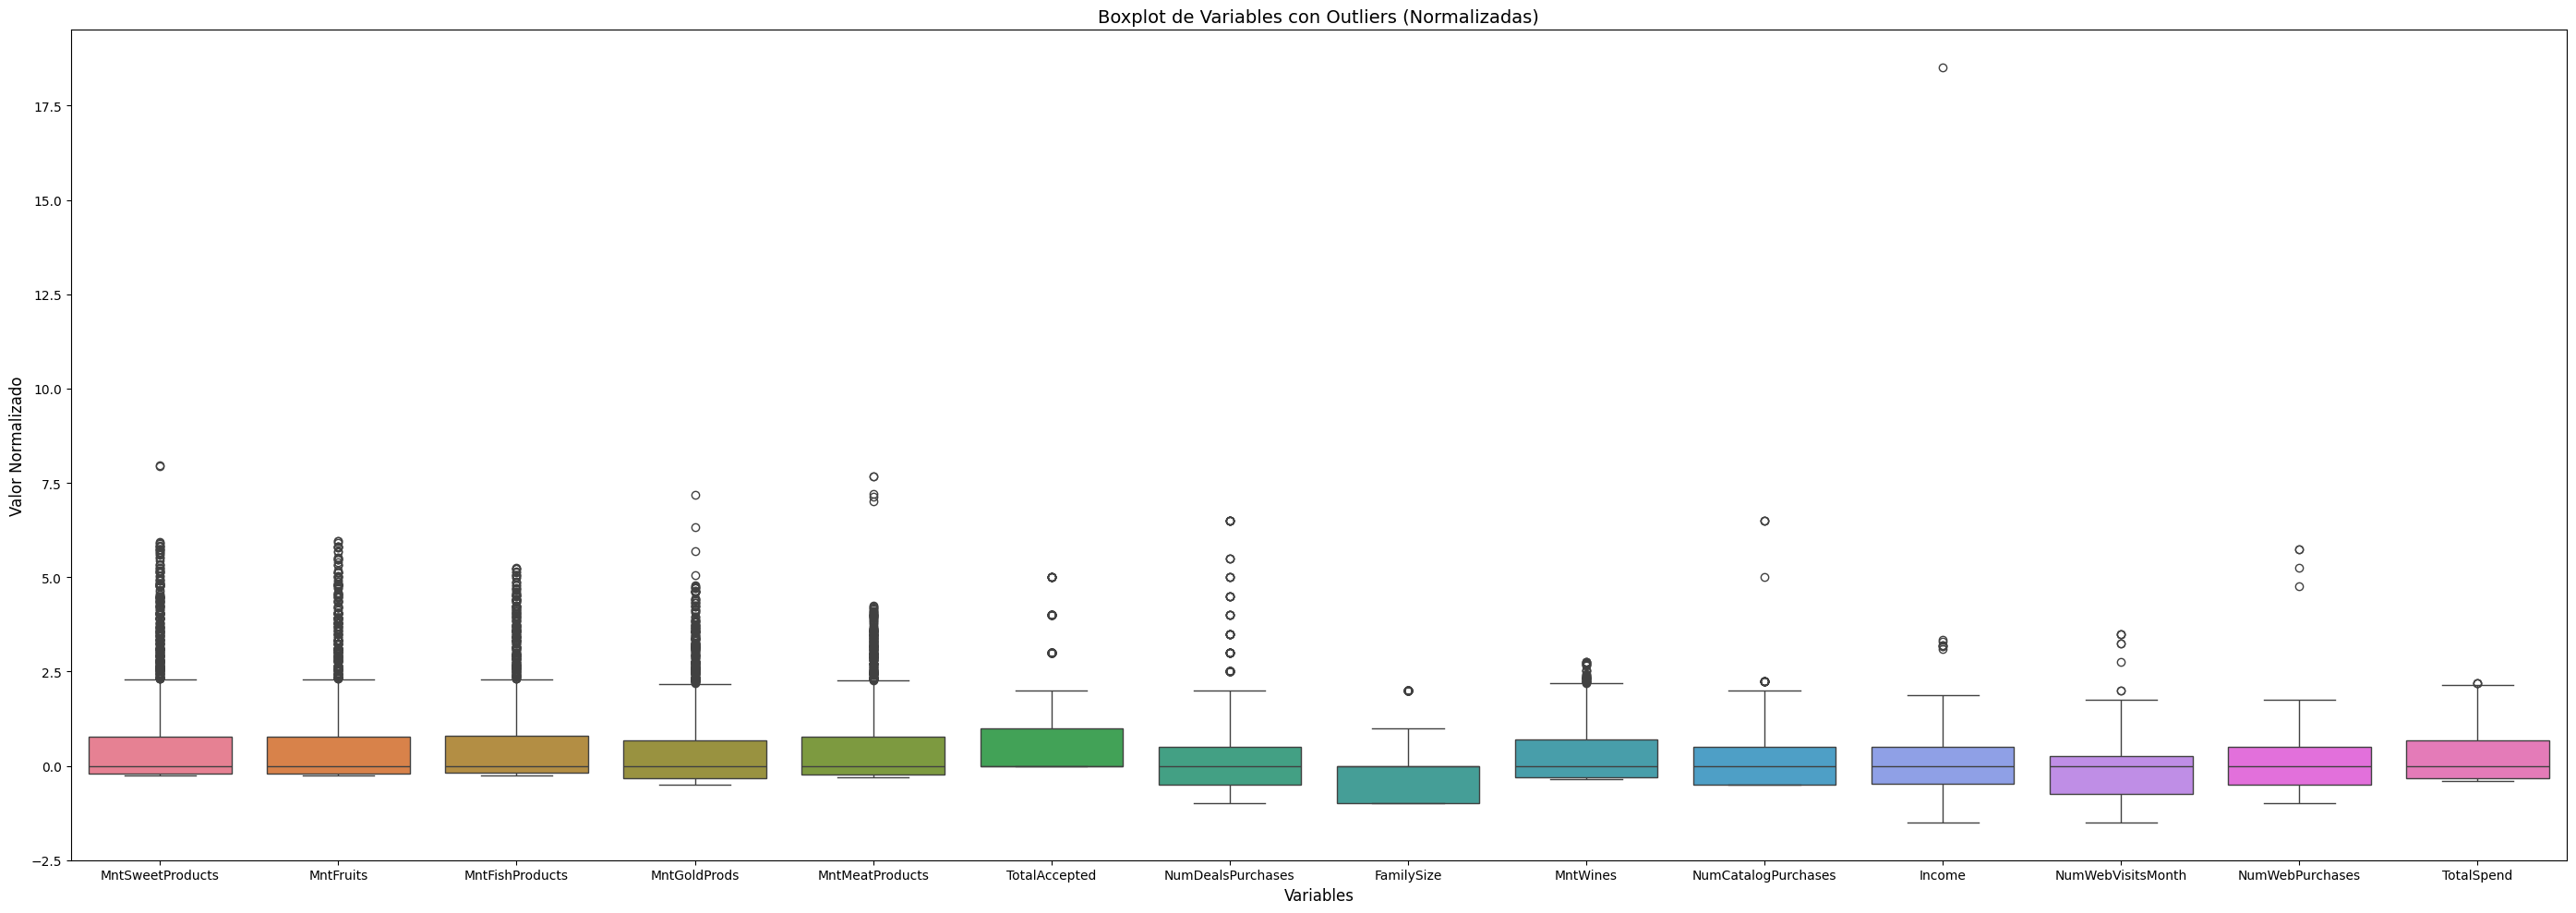

In [62]:
columnas_outliers = outliers_df['Columna'].tolist()
plot_boxplot_outliers(df, columnas_outliers)

#### Tratamiento de Outliers

En esta etapa, analizamos la presencia de valores atípicos en las variables numéricas.  
Si bien algunas columnas —como los montos de gasto o los ingresos— presentan valores extremos, en este caso **no realizaremos ninguna eliminación ni transformación**.

La razón es que este es un **ejercicio de clustering**, y los outliers pueden contener información valiosa sobre subgrupos de clientes, como consumidores de alto gasto o perfiles poco frecuentes.  
Eliminar o recortar estos casos podría distorsionar la estructura natural de los datos y ocultar segmentos relevantes.

Por lo tanto, **mantendremos los valores originales** y solo los consideraremos más adelante al interpretar los resultados de los clusters.


In [63]:
def calcular_porcentaje_nulos(df):
    """
    Calcula el porcentaje de valores nulos por columna y devuelve las columnas
    con valores nulos en orden decreciente según el porcentaje.

    Args:
    df (pd.DataFrame): DataFrame a analizar.

    Returns:
    pd.DataFrame: DataFrame con columnas `columna` y `porcentaje_nulos`.
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().mean() * 100

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos_df = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos_df.columns = ['columna', 'porcentaje_nulos']

    return nulos_df

In [64]:
calcular_porcentaje_nulos(df)

,columna,porcentaje_nulos
0,Income,1.072865


In [65]:
def imputar_valores_nulos(data, columnas_outliers):
    """
    Imputa los valores nulos en el DataFrame según las reglas especificadas:
    - Para las variables numéricas:
        - Si no tiene outliers, se imputa con la media.
        - Si tiene outliers, se imputa con la mediana.
    - Para las variables categóricas, se imputa con la moda.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada con los valores nulos.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.

    Devuelve:
        pd.DataFrame: El DataFrame con los valores nulos imputados.
    """
    for col in data.columns:
        if data[col].dtype == 'object':  # Categóricas
            # Imputar con la moda para columnas categóricas
            moda = data[col].mode()[0]
            data[col] = data[col].fillna(moda)

        else:  # Numéricas
            if col in columnas_outliers:
                # Imputar con la mediana si la columna tiene outliers
                mediana = data[col].median()
                data[col] = data[col].fillna(mediana)
            else:
                # Imputar con la media si la columna no tiene outliers
                media = data[col].mean()
                data[col] = data[col].fillna(media)

    return data

In [66]:
df = imputar_valores_nulos(df, columnas_outliers)

In [67]:
calcular_porcentaje_nulos(df)

,columna,porcentaje_nulos


In [68]:
def eliminar_columnas_irrelevantes(data):
    """
    Elimina columnas irrelevantes del DataFrame.
    - Elimina columnas con un solo valor.
    - Elimina columnas específicas como 'id' y 'year'.

    Parámetros:
        data (pd.DataFrame): El DataFrame que contiene las variables a procesar.

    Devuelve:
        pd.DataFrame: El DataFrame con las columnas irrelevantes eliminadas.
    """
    # Eliminar columnas con un solo valor
    columnas_a_eliminar = [col for col in data.columns if len(data[col].unique()) == 1]

    # Eliminamos las columnas del DataFrame
    data = data.drop(columns=columnas_a_eliminar, axis=1)

    return data

In [69]:
# Mostrar el número de valores únicos de cada columna
print(df.nunique())

Education                 5
Marital_Status            6
Income                 1971
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                775
MntFruits               158
MntMeatProducts         557
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Age                      56
FamilySize                4
TotalSpend             1054
Customer_Tenure         663
TotalAccepted             6
dtype: int64


In [70]:
df= eliminar_columnas_irrelevantes(df)

#### Encoding y Normalizado

In [71]:
def preprocesar_data(data):
    """
    Preprocesa el conjunto de entrenamiento.
    - Aplica One Hot Encoding en variables categóricas con <= 8 categorías.
    - Aplica Label Encoding en variables categóricas con > 8 categorías.
    - Escala las variables numéricas según su asimetría (StandardScaler o MinMaxScaler).
    """
    data = data.copy()

    # Inicializamos los transformadores
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    label_encoder = LabelEncoder()
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Identificamos variables categóricas y numéricas
    categorias = data.select_dtypes(include=['object']).columns
    numericas = data.select_dtypes(exclude=['object']).columns

    # Codificación de variables categóricas
    for col in categorias:
        if data[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(data[[col]])
            encoded_df = pd.DataFrame(
                encoded,
                columns=onehot_encoder.get_feature_names_out([col]),
                index=data.index
            )
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(columns=[col], inplace=True)
        else:
            data[col] = label_encoder.fit_transform(data[col])

    # Actualizamos lista de numéricas (por si el encoding agregó columnas)
    numericas = data.select_dtypes(exclude=['object']).columns

    # Escalado numérico según skewness
    for col in numericas:
        skewness = skew(data[col].dropna())
        if abs(skewness) > 1:
            data[col] = minmax_scaler.fit_transform(data[[col]])
        else:
            data[col] = standard_scaler.fit_transform(data[[col]])

    return data

In [72]:
df = preprocesar_data(df)

# RFM


Para segmentar a los clientes según su comportamiento de compra, se construyen las tres variables base del modelo **RFM**:

- **Recency**: tiempo desde la última compra. En este dataset se representa con la variable `Recency` (valores más bajos = más recientes).
- **Frequency**: cantidad de compras realizadas. Se calcula sumando las variables de compras (`NumWebPurchases`, `NumStorePurchases`, `NumCatalogPurchases`, `NumDealsPurchases`).
- **Monetary**: monto total gastado. Se obtiene como la suma de las columnas que representan gasto en distintas categorías (`MntWines`, `MntMeatProducts`, `MntGoldProds`, etc.).

Además, se incluye una variable adicional **`web_visits`**, que sirve como proxy de engagement digital.


In [73]:
# Monetary = suma de todas las columnas de gasto
money_cols = [c for c in df.columns if c.lower().startswith("mnt")]
df["RFM_Monetary"] = df[money_cols].sum(axis=1)

In [74]:
# Frequency = suma de todas las columnas relacionadas con compras (no incluye visitas)
freq_cols = [c for c in df.columns if "purchases" in c.lower()]
df["RFM_Frequency"] = df[freq_cols].sum(axis=1)

In [75]:
# Recency = usamos la columna Recency tal cual (menor valor = más reciente)
df["RFM_Recency"] = df["Recency"]

# Web engagement = visitas al sitio web
df["Web_Visits"] = df["NumWebVisitsMonth"]

In [76]:
# Inspección de las nuevas variables
print("Columnas de monto detectadas:", money_cols)
print("Columnas de frecuencia detectadas:", freq_cols)
display(df[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]].describe().T)

# Outliers extremos en Monetary (percentil 99)
if "RFM_Monetary" in df.columns:
    p99_monetary = df["RFM_Monetary"].quantile(0.99)
    ratio_outliers = (df["RFM_Monetary"] > p99_monetary).mean() * 100
    print(f"Percentil 99 de 'RFM_Monetary': {p99_monetary:.2f}")
    print(f"Clientes por encima del p99: {ratio_outliers:.2f}%")

Columnas de monto detectadas: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Columnas de frecuencia detectadas: ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


,count,mean,std,min,25%,50%,75%,max
RFM_Monetary,2237.0,8.016500e-01,0.799360,0.005268,0.123828,0.472579,1.365043,3.577919
RFM_Frequency,2237.0,4.015842e-01,1.132256,-1.782765,-0.652342,0.213532,1.224114,3.115385
RFM_Recency,2237.0,1.195090e-16,1.000224,-1.696210,-0.867183,-0.003613,0.859956,1.723526
Web_Visits,2237.0,1.143475e-16,1.000224,-2.192713,-0.956029,0.280654,0.692882,6.051843


Percentil 99 de 'RFM_Monetary': 2.96
Clientes por encima del p99: 1.03%


# PCA

Antes de aplicar los algoritmos de *clustering*, utilizamos **PCA (Principal Component Analysis)** para reducir la dimensionalidad del conjunto de variables RFM.  
Esto permite:

- **Simplificar la estructura de los datos**, reteniendo la mayor parte de la varianza.  
- **Visualizar de manera más clara** los patrones y agrupamientos potenciales entre clientes.  
- **Facilitar la interpretación** posterior de los resultados de clustering.

En este paso se analiza cuánta varianza explica cada componente y se grafican los dos primeros para observar posibles estructuras de clusters.


In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [78]:
# Seleccionamos solo las variables RFM escaladas
rfm_scaled = df[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]]

In [79]:
# Aplicamos PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(rfm_scaled)

In [80]:
# Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Mostramos resultados
for i, v in enumerate(varianza_explicada):
    print(f"Componente {i+1}: {v*100:.2f}% de varianza explicada")
print(f"Varianza total explicada por los 2 primeros componentes: {varianza_acumulada[1]*100:.2f}%")

Componente 1: 51.34% de varianza explicada
Componente 2: 25.52% de varianza explicada
Componente 3: 17.19% de varianza explicada
Componente 4: 5.96% de varianza explicada
Varianza total explicada por los 2 primeros componentes: 76.86%


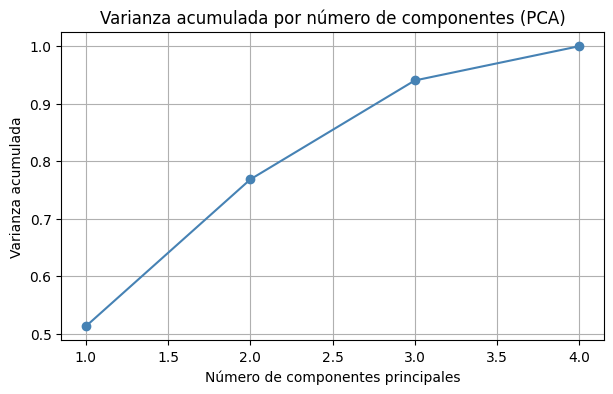

In [81]:
# Gráfico de varianza acumulada
plt.figure(figsize=(7,4))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', color='steelblue')
plt.title("Varianza acumulada por número de componentes (PCA)")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.show()

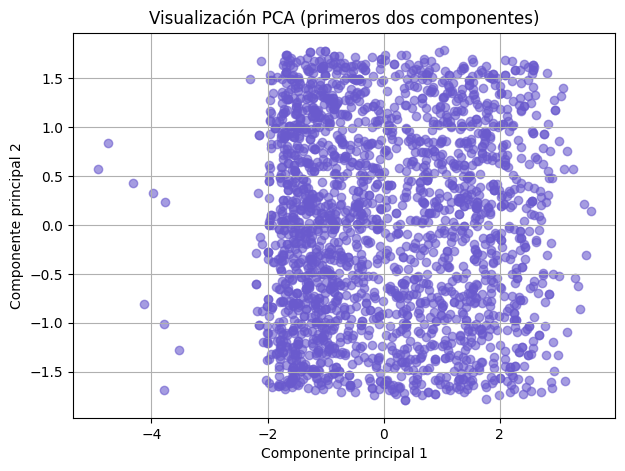

In [82]:
# Gráfico de dispersión (2 componentes principales)
plt.figure(figsize=(7,5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, color='slateblue')
plt.title("Visualización PCA (primeros dos componentes)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

### Interpretación de los resultados del PCA

El análisis de componentes principales (PCA) muestra que:

- **Componente 1** explica el **51.34 %** de la varianza.
- **Componente 2** explica el **25.52 %** adicional.
- En conjunto, los dos primeros componentes capturan el **76.86 %** de la varianza total del conjunto de variables RFM.

Esto indica que el PCA logra representar de forma eficiente la estructura de los datos en un espacio bidimensional, manteniendo la mayor parte de la información relevante sobre el comportamiento de los clientes.  
Por lo tanto, es adecuado utilizar estos dos componentes para **visualizar y aplicar técnicas de clustering** (como K-Means), ya que simplifican la interpretación sin pérdida significativa de información.


# Clustering

### Determinación del número óptimo de clusters

Antes de aplicar K-Means, es importante definir cuántos clusters son apropiados para los datos.  
Para ello, se utilizan dos métodos complementarios:

1. **Método del Codo (Elbow Method):**
   - Evalúa la **inercia intra-cluster (SSE)**, es decir, la suma de las distancias cuadradas entre los puntos y el centroide del cluster.
   - A medida que aumenta el número de clusters, la inercia disminuye, pero llega un punto donde la mejora se vuelve marginal.
   - Ese punto de inflexión o *codo* indica el número óptimo de clusters.

2. **Silhouette Score:**
   - Mide qué tan bien se agrupan los puntos dentro de su propio cluster en comparación con otros.
   - Toma valores entre -1 y 1: cuanto más cercano a 1, mejor la separación y cohesión de los clusters.

Estos métodos permiten identificar una cantidad de clusters razonable antes de realizar el análisis final de segmentación.


In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [84]:
# --- Determinación del número óptimo de clusters ---
X = df[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]]

inertia = []
silhouette = []

K = range(2, 11)  # probamos entre 2 y 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

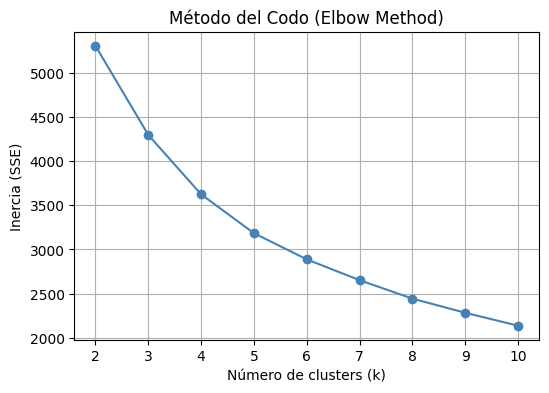

In [85]:
# --- Gráfico del método del codo ---
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'o-', color='steelblue')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.grid(True)
plt.show()

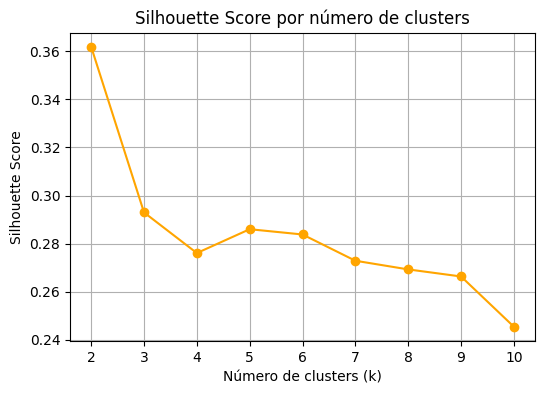

In [86]:
# --- Gráfico del Silhouette Score ---
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette, 'o-', color='orange')
plt.title("Silhouette Score por número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [87]:
# Mostrar los valores numéricos
for k, s in zip(K, silhouette):
    print(f"k={k}: silhouette_score={s:.4f}")

k=2: silhouette_score=0.3619
k=3: silhouette_score=0.2930
k=4: silhouette_score=0.2761
k=5: silhouette_score=0.2860
k=6: silhouette_score=0.2838
k=7: silhouette_score=0.2729
k=8: silhouette_score=0.2693
k=9: silhouette_score=0.2663
k=10: silhouette_score=0.2454


### Selección del número óptimo de clusters

Al analizar los resultados:

| k | Silhouette Score |
|---|-------------------|
| 2 | **0.36** |
| 3 | 0.29 |
| 4 | 0.28 |
| 5 | 0.29 |
| 6 | 0.28 |

Se observa que el **puntaje más alto corresponde a k = 2**, lo cual indica que una segmentación en **dos clusters** logra el mejor equilibrio entre cohesión interna y separación entre grupos.

Por lo tanto, se procederá a aplicar **K-Means con k = 2**, y posteriormente se visualizarán los resultados sobre los dos primeros componentes principales obtenidos con PCA.


# KMeans

### Aplicación de K-Means y visualización de clusters

Con base en el análisis previo, se aplicará **K-Means con k = 2**, que fue el valor que optimizó el *Silhouette Score*.  
El objetivo es identificar dos grupos de clientes con comportamientos diferenciados según las variables RFM.

Posteriormente, se visualizarán los resultados en el espacio de los dos primeros componentes principales (PCA), para analizar la separación entre los grupos.


In [91]:
semilla = 142857

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# --- Aplicar K-Means con k=2 ---
kmeans = KMeans(n_clusters=2, random_state=semilla, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]])

In [93]:
# --- Agregar resultados PCA para visualización ---
pca_df = pd.DataFrame(pca_result[:, :2], columns=["PCA1", "PCA2"])
pca_df["Cluster"] = df["Cluster"]

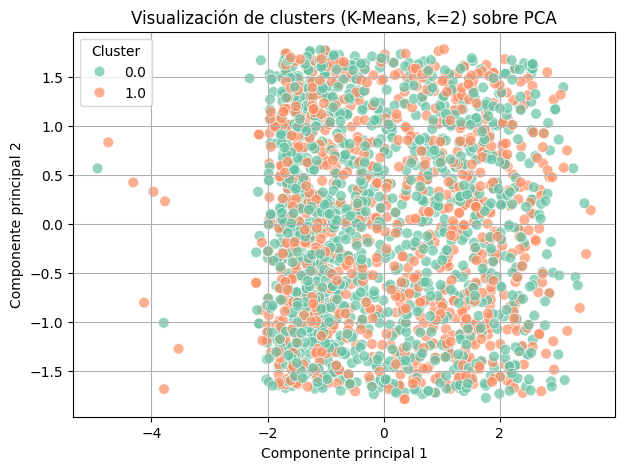

In [94]:
# --- Gráfico de dispersión PCA ---
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_df,
    x="PCA1", y="PCA2",
    hue="Cluster", palette="Set2", s=60, alpha=0.7
)
plt.title("Visualización de clusters (K-Means, k=2) sobre PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [95]:
# --- Resumen estadístico por cluster ---
cluster_summary = df.groupby("Cluster")[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]].mean()
display(cluster_summary.style.format("{:.2f}").set_caption("Promedio de variables RFM por cluster"))

,RFM_Monetary,RFM_Frequency,RFM_Recency,Web_Visits
Cluster,,,,
0,0.25,-0.38,0.00,0.52
1,1.52,1.43,-0.00,-0.68


### Interpretación de los clusters

Del análisis de las medias estandarizadas de las variables RFM por grupo se observan las siguientes diferencias:

| Cluster | RFM_Monetary | RFM_Frequency | RFM_Recency | Web_Visits | Perfil resumido |
|----------|---------------|---------------|--------------|-------------|-----------------|
| **0** | 0.25 | -0.38 | 0.00 | **0.52** | Clientes con baja frecuencia y gasto, pero mayor interacción online. |
| **1** | **1.52** | **1.43** | -0.00 | -0.68 | Clientes de alto valor: compran con mayor frecuencia y gastan más, pero con menor actividad web. |

**Conclusión:**  
El modelo K-Means con *k = 2* permitió identificar dos segmentos principales:

- 🟩 **Cluster 1 – Clientes de alto valor:** concentran el gasto y la frecuencia de compra más elevados. Son menos activos en la web, posiblemente clientes fidelizados o con relación más directa con la marca.  
- 🟦 **Cluster 0 – Clientes digitales de bajo valor:** menor gasto y frecuencia de compra, pero más visitas web, lo que indica potencial para estrategias de conversión digital o retención.

Estos hallazgos ofrecen una base inicial para la segmentación y el diseño de estrategias de marketing diferenciadas según el perfil del cliente.


### Visualización comparativa de clusters – Gráfico Radar

El gráfico radar (o *spider chart*) permite comparar las características promedio de cada cluster sobre múltiples dimensiones simultáneamente.

Cada eje representa una variable RFM (más la métrica de visitas web), y el tamaño de la figura indica el nivel relativo del cluster en esa dimensión.  
De esta forma, se pueden observar de manera clara las diferencias de comportamiento entre los dos grupos de clientes.


In [96]:
import matplotlib.pyplot as plt
import numpy as np

In [97]:
# --- Preparamos los datos ---
cluster_means = df.groupby("Cluster")[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]].mean()

# Variables y número de clusters
variables = cluster_means.columns.tolist()
num_vars = len(variables)
num_clusters = len(cluster_means)

# Ángulos para el gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # cierre del gráfico

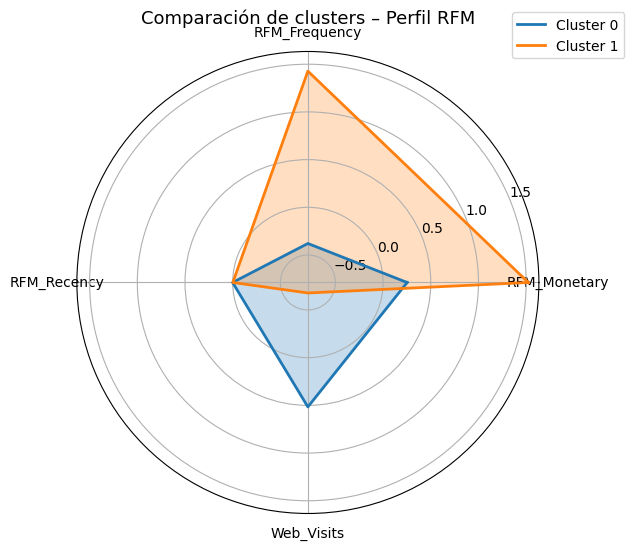

In [98]:
# --- Crear gráfico radar ---
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(num_clusters):
    values = cluster_means.iloc[i].tolist()
    values += values[:1]  # cierre del polígono
    ax.plot(angles, values, label=f"Cluster {i}", linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# --- Formato ---
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=10)
ax.set_title("Comparación de clusters – Perfil RFM", size=13, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.grid(True)

plt.show()

## Conclusiones e interpretación del análisis de clustering

El análisis de *clustering* basado en las variables **RFM** (Recency, Frequency, Monetary) y la métrica de **visitas web** permitió identificar **dos segmentos principales de clientes** con comportamientos claramente diferenciados.

### 🟩 Cluster 1 – Clientes de alto valor
- **Gasto promedio (Monetary):** muy superior al promedio general.  
- **Frecuencia de compra:** alta, lo que sugiere clientes fieles o con recurrencia consolidada.  
- **Visitas web:** menores, posiblemente realizan compras directas o ya conocen bien los productos.  
- **Recencia:** valores similares al promedio, lo que indica actividad constante.

**Interpretación:** este grupo representa la **base de clientes de mayor valor**.  
Las estrategias recomendadas podrían incluir programas de fidelización, beneficios exclusivos y venta cruzada (*cross-selling*).

---

### 🟦 Cluster 0 – Clientes digitales de bajo valor
- **Gasto y frecuencia:** significativamente menores.  
- **Visitas web:** más altas, lo que indica interés o exploración, pero baja conversión.  
- **Recencia:** promedio similar, aunque la interacción digital es más marcada.

**Interpretación:** estos clientes muestran **potencial de crecimiento**, pero aún con baja rentabilidad.  
Se recomienda diseñar **estrategias de remarketing o retención digital**, enfocadas en incrementar su tasa de conversión.

---

### 🎯 Conclusión general
El modelo K-Means con *k = 2* ofrece una segmentación clara y accionable:

| Cluster | Perfil principal | Estrategia sugerida |
|----------|-----------------|---------------------|
| **1** | Clientes leales y rentables | Fidelización y beneficios exclusivos |
| **0** | Clientes digitales de bajo gasto | Campañas de conversión y engagement digital |

Este análisis permite a las áreas de **marketing y CRM** priorizar recursos, personalizar comunicaciones y optimizar las acciones de retención y adquisición de clientes.


In [100]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [101]:
X = df[["RFM_Monetary", "RFM_Frequency", "RFM_Recency", "Web_Visits"]]
labels = df["Cluster"]

In [102]:
# Calcular métricas
silhouette = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)
chi = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies–Bouldin Index (DBI): {dbi:.4f}")
print(f"Calinski–Harabasz Index (CHI): {chi:.2f}")

Silhouette Score: 0.3619
Davies–Bouldin Index (DBI): 1.1683
Calinski–Harabasz Index (CHI): 1458.26


### Evaluación del modelo de clustering

Se calcularon tres métricas para evaluar la calidad de la segmentación obtenida con K-Means:

| Métrica | Valor | Interpretación |
|----------|--------|----------------|
| **Silhouette Score** | **0.36** | Buena cohesión interna y separación razonable entre grupos (valores > 0.25 se consideran aceptables en datos reales con solapamiento). |
| **Davies–Bouldin Index (DBI)** | **1.17** | Relativamente bajo; indica clusters bien definidos con poca superposición. Cuanto menor, mejor. |
| **Calinski–Harabasz Index (CHI)** | **1458.26** | Alto valor; sugiere que la separación entre clusters es claramente mayor que la dispersión interna. |

### 💡 Conclusión técnica
Los valores obtenidos respaldan que la segmentación en **dos clusters** es **estable y significativa**.  
Si bien el *Silhouette Score* no es extremadamente alto (lo cual es esperable en datos de comportamiento real con solapamiento entre grupos), las tres métricas en conjunto muestran que los clusters están **bien definidos, diferenciados y útiles para análisis estratégico posterior**.
